# <center> <font color='Purple' face='Cursive'>  Telecom Churn Analysis </b></center>

<b><font color = 'Maroon'><b>Background:</b></font> <br></b>
&emsp;In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again)

<font faces='Courier' color = 'red'><b>Problem Statement:</b></font>
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.<br><br>

<font faces='Courier' color = 'olive'><b>Business Objective:</b></font>
The dataset provided contains customer-level information for a span of four consecutive months - June, July, August and September.
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

### <font color='Bronze' face='Cursive'>  Now that we have understood what we are actually working on with the dataset. Let's go ahead and start analysing the data set for the same </font>

In [1]:
# Import Libraries necessary for Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Libraries for train-test split
from sklearn.model_selection import train_test_split

# Import Libraries for SMOTE
from imblearn.over_sampling import SMOTE 

# Import Libraries for Pre-processing steps of model Building
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Import Model Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Libraries for metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

# Imports For Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance


# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

 <font color="#1F45FC" face='Comic Sans MS'> Lets read the dataset provided and check whether the dataset has been read correctly</font>

In [2]:
# Import the dataset
telecom = pd.read_csv(r"telecom_churn_data.csv")

# Display top 5 rows of the dataframe
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Check Shape of the data set
telecom.shape

(99999, 226)

<font color="#1F45FC" face='Comic Sans MS'> We can see that there are 99999 rows and 226 columns in the data set. However we have no idea what this 226 columns represent. So let's import the data dictionary to check what each of these columns represent </font>

In [4]:
df = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

In [5]:
df

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [6]:
# Check Info
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
telecom.columns.tolist()

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

<font color="#254117" face='Verdana'> We imported the data set and also had a look at the columns in the data set. Now our next target to treat any missing values and outliers </font>

## <font color="Caramel" face='Cursive'> Data Cleaning Part-1</font>

<font color="#E55451" face='Comic Sans MS'> We will start with treating the columns having same data throughout. Once we are done with that we will move to next step which is missing value treatment</font>

In [8]:
# Find columns having same value in all rows
sam_val=[]
for col in telecom.columns:
    if(telecom[col].nunique()==1):
        sam_val.append(col)

        
print("There are",len(sam_val)," columns having same Values in all rows and they are:", sam_val)

There are 16  columns having same Values in all rows and they are: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


<b><font color="#7D0552" face='Comic Sans MS'> The above columns have the values in all rows same. So they will not be of much help in the analysis. So dropping all those columns </font></b>

In [9]:
# Drop all the columns that have all values same
telecom_clean = telecom.drop(sam_val,axis=1)
telecom_clean.shape

(99999, 210)

<b><font color="#E3319D" face='Comic Sans MS'>We are done with removing columns having same values throughout the columns, so lets Check for Null Values in the data</font></b>

In [10]:
telecom_clean.columns[telecom_clean.isnull().any()].tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


<b><font color="#2B547E" face='Comic Sans MS'> Since there are so many columns having null values, it would be easier to treat these values once we get the required data for Analysis, instead of working on the whole data set. So lets first seggregate the High Value customers and then do cleaning on that data</font></b>

## <font color="#CA226B" face='Cursive'> Data Preparation Part-1</font>

<b><font color="Red" face='Comic Sans MS'> We have decided to segregate the High value customers, we should be knowing who could be considered as a high value customer. Lets see the business definition for a high value customer</font><br>
    
<font color="Olive" face='Comic Sans MS'>According to business,High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).</font></b>

<b> <font color="#E238EC" face='Comic Sans MS'> Now that we understand who high value customers are. Let's try to make sure there is only one record for one customer. We can do this by verifying mobile number</font></b>

In [11]:
# Check whether the Mobile number is unique
telecom_clean.mobile_number.nunique()

99999

<b> <font color="#E238EC" face='Comic Sans MS'> Since number of unique values is equal to number of rows we have confirmed that each customer has only one record in data provided. Now we will try to segregate the data of high value customers. Here we are using total_rech_amt as the total amount of recharge for month which includes data as its prepaid</font></b>

<br>
<b> <font color="#8C001A" face='Comic Sans MS'> But we don't have features ready for the same, so let's derive a features which would help us on deciding on High Value Customers </font></b>
<br><br>
<b> <font color="Red" face='Comic Sans MS'> We need to calculate the amount spent on data recharge to account for total recharge amount which can be calculated by av_rech_amt_data_x * total_rech_data_x where x is 6,7,8,9

In [12]:
# Calculate amount spent on data recharge
telecom_clean['total_rech_data_amt_6'] = telecom_clean['av_rech_amt_data_6'] * telecom_clean['total_rech_data_6']
telecom_clean['total_rech_data_amt_7'] = telecom_clean['av_rech_amt_data_7'] * telecom_clean['total_rech_data_7']
telecom_clean['total_rech_data_amt_8'] = telecom_clean['av_rech_amt_data_8'] * telecom_clean['total_rech_data_8']
telecom_clean['total_rech_data_amt_9'] = telecom_clean['av_rech_amt_data_9'] * telecom_clean['total_rech_data_9']

<b> <font color="#B93B8F" face='Monospace'> Now lets go ahead and calculate the average recharge done in first two months(The Good Phase). The total amount would be sum of total recharge amounts and also amount recharged for data</font><br><br> <font color="Olive" face='Monospace'>It has to be noted that there is possibility of having null values  has few null values. Let's try to handle null values and find avg rechange in one go. 
   <br> We will be imputing null values of the columns by 0 as Null values here indicate customer did not use the service.</font></b>

In [13]:
# Impute null values by 0 and calculate average
telecom_clean['telecom_av_rech_good_phase'] = (telecom_clean['total_rech_amt_6'].fillna(0) 
+ telecom_clean['total_rech_amt_7'].fillna(0) + telecom_clean['total_rech_data_amt_6'].fillna(0) 
+ telecom_clean['total_rech_data_amt_7'].fillna(0) )/2

 <b><font color="#B93B8F" face='Monospace'> Here we have average of recharges in good phase. So our next step would be find High valued customers</font></b>

In [14]:
# Calculate 70% of average recharge amount in the first two months 
min_per_hv = np.percentile(telecom_clean['telecom_av_rech_good_phase'], 70.0)

min_per_hv

478.0

In [15]:
# Create a new dataset comprising only of high valued customers
telecom_hv = telecom_clean[telecom_clean['telecom_av_rech_good_phase'] >= min_per_hv]

telecom_hv.shape

(30001, 215)

<b><font color="#B93B8F" face='Monospace'> Lets drop telecom_av_rech_good_phase since we no longer need it </font></b>

In [16]:
# drop telecom_av_rech_good_phase
telecom_hv.drop(['telecom_av_rech_good_phase'],axis=1,inplace=True)

telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(30001, 214)

<b><font color="#7D1B7E" face='Consolas'> Now that we found out the High valued customers. We will derive our target variable which is whether customer churns or not</font></b>

<b><font color="Red" face='Comic Sans MS'> But Which Customers can be considered as Churned? </font>
<br>
<font color="#E238EC" face='Comic Sans MS'> According to Business, Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase </font>
<br>    
<font color="Olive" face='Comic Sans MS'> Now we know which customers are considered churn by Business.</font> <font color="Red" face='Comic Sans MS'>What can be considered as the churn phase?</font>
<br>
<font color="#E238EC" face='Comic Sans MS'>In this case, since We are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.</font></b>
<br><br>
<font color="#E3319D" face='Comic Sans MS'>Now lets define how we are going to findout churners, Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in 4th month of given data i.e., Sep are considered as churners </font></b>

<font color="Green" face='Comic Sans MS'>The attributes we need to use to tag churners are:
 - total_ic_mou_9
 - total_og_mou_9
 - vol_2g_mb_9
 - vol_3g_mb_9
 
If all these attributes are zero (0) then they can be tagged as churned

<font color="#614051" face='Comic Sans MS'>There might be a chance that there are null values. So lets fill up null values with 0 and at the same time create a new column which represents whether the customer has churned or not. First we assign a True or False in the column and later we will be making it 1 for churn and 0 for non churn </font>

In [17]:
# Find churn and non-churn
telecom_hv['Churn'] = (telecom_hv['total_ic_mou_9'].fillna(0)==0) & (telecom_hv['total_og_mou_9'].fillna(0)==0) & (telecom_hv['vol_2g_mb_9'].fillna(0)==0) & (telecom_hv['vol_3g_mb_9'].fillna(0)==0)

telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30001, 215)

In [18]:
# Check values in telecom_hv['Churn']
telecom_hv['Churn'].head()

0      True
7      True
8     False
21    False
23    False
Name: Churn, dtype: bool

In [19]:
# Coverting churn info into 0's and 1's
telecom_hv['Churn'] = telecom_hv['Churn'].apply(lambda x: 1 if x==True else 0)

telecom_hv['Churn'].head()

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

## <font color="Caramel" face='Cursive'> Data Cleaning Part-2</font>

<font color="#151B54" face='Comic Sans MS'> Let's check if there is some relationship between total reacharge data and sachet data</font>

In [20]:
# Checking if the sum of count_rech_2g and count_rech_3g matches with that of total_rech_data

print("For month 6")
print(telecom_hv[telecom_hv.monthly_2g_6+ telecom_hv.sachet_2g_6 + telecom_hv.monthly_3g_6 + telecom_hv.sachet_3g_6 != telecom_hv.total_rech_data_6].shape)

print("For month 7")
print(telecom_hv[telecom_hv.monthly_2g_7+ telecom_hv.sachet_2g_7 + telecom_hv.monthly_3g_7 + telecom_hv.sachet_3g_7 != telecom_hv.total_rech_data_7].shape)

print("For month 8")
print(telecom_hv[telecom_hv.monthly_2g_8 + telecom_hv.sachet_2g_8 + telecom_hv.monthly_3g_8 + telecom_hv.sachet_3g_8 != telecom_hv.total_rech_data_8].shape)

print("For month 9")
print(telecom_hv[telecom_hv.monthly_2g_9 + telecom_hv.sachet_2g_9 + telecom_hv.monthly_3g_9 + telecom_hv.sachet_3g_9 != telecom_hv.total_rech_data_9].shape)

For month 6
(13245, 215)
For month 7
(12944, 215)
For month 8
(14048, 215)
For month 9
(14781, 215)


<font color="#151B54" face='Comic Sans MS'> Since all the values are same we can go ahead and drop those columns. Also we are accounting for a new feature based on av_rech_amt_data_x &  total_rech_data_x. So drop those as well 

In [21]:
cols_drop =['monthly_2g_6','monthly_3g_6','sachet_3g_6','monthly_2g_6','monthly_2g_7','monthly_3g_7','sachet_3g_7',
            'monthly_2g_7','monthly_2g_8','monthly_3g_8','sachet_3g_8','monthly_2g_8','monthly_2g_9','monthly_3g_9',
            'sachet_3g_9','monthly_2g_9','av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7','total_rech_data_7',
            'av_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_9','total_rech_data_9','sachet_2g_7','sachet_2g_6','sachet_2g_8']
telecom_hv.drop(cols_drop,axis=1,inplace=True)

telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(30001, 192)

<font color="#B048B5" face='Comic Sans MS'> Now that we have found out churned Customers and created new column for churn. We should not be considering any data of last month in analysis because we are actually analysing for behaviour in last month. So if we consider a real time scenario we would not be having data of 9th month while executing. So we will remove all the data that is available on 9th month</font>

In [22]:
#Find all columns ending with 9 as they belong to Sept month
drop_cols = [col for col in telecom_hv if col[-1]=='9']
drop_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'sachet_2g_9',
 'fb_user_9',
 'total_rech_data_amt_9']

In [23]:
# Remove this list of columns above
telecom_hv.drop(drop_cols,axis=1,inplace=True)

# Check Shape
telecom_hv.shape

(30001, 145)

<font color="#7F38EC" face='Comic Sans MS'> We know that there are so many missing values in the data, So its our priority to make sure there are no nulls or missing values.</font><br>

In [24]:
# Check Info
telecom_hv.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 145 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             30001 non-null  int64  
 1   arpu_6                    30001 non-null  float64
 2   arpu_7                    30001 non-null  float64
 3   arpu_8                    30001 non-null  float64
 4   onnet_mou_6               29456 non-null  float64
 5   onnet_mou_7               29464 non-null  float64
 6   onnet_mou_8               28827 non-null  float64
 7   offnet_mou_6              29456 non-null  float64
 8   offnet_mou_7              29464 non-null  float64
 9   offnet_mou_8              28827 non-null  float64
 10  roam_ic_mou_6             29456 non-null  float64
 11  roam_ic_mou_7             29464 non-null  float64
 12  roam_ic_mou_8             28827 non-null  float64
 13  roam_og_mou_6             29456 non-null  float64
 14  roam_

<font color='#E67451' faces = 'Open Sans'>On Checking Info there is one more col sep_vbc_3g which relates to september month. So that's not required. Dropping that</font>

In [25]:
# Drop sep_vbc_3g
telecom_hv.drop('sep_vbc_3g',axis=1,inplace=True)

In [26]:
# Check Null values in dataframe
telecom_hv.columns[telecom_hv.isnull().any()].tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

<font color="#7F38EC" face='Comic Sans MS'> We have now seen the columns having null values. Out of those there are below mentioned date columns.
 - date_of_last_rech_6
 - date_of_last_rech_7
 - date_of_last_rech_8
 - date_of_last_rech_data_6
 - date_of_last_rech_data_7
 - date_of_last_rech_data_8 </font>
 
 <font color="#E4287C" face='Comic Sans MS'> Our unserstanding about telecom domain is that the amount the customers reccharged is more important than date of recharge, as there are chances that a customer very well aware of his usage and recharges at the start of the month and some others might might prefer small recharges through out the month, so dates are of less significance in this context. So lets drop those columns</font>

In [27]:
# Drop Unrequired Columns
telecom_hv.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',],axis=1,inplace=True)

# Check shape
telecom_hv.shape

(30001, 138)

In [28]:
# Check Null values in dataframe
telecom_hv.columns[telecom_hv.isnull().any()].tolist()

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

 <font color="#9F000F" face='Comic Sans MS'> All the above null value columns might be null because the user hasn't used that particular service. So they can be replaced by 0 </font>

In [29]:
# Fill Null Values with 0
telecom_hv[telecom_hv.columns[telecom_hv.isnull().any()].tolist()]=telecom_hv[telecom_hv.columns[telecom_hv.isnull().any()].tolist()].fillna(0)

# Check for null values
telecom_hv.columns[telecom_hv.isnull().any()].tolist()

C:\Users\91967\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


[]

In [30]:
#Check Shape
telecom_hv.shape

(30001, 138)

<font color="#C85A17" face='Comic Sans MS'> Final Check if there any columns that have the same value </font>

In [31]:
# Find columns having same value in all rows
sam_val=[]
for col in telecom_hv.columns:
    if(telecom_hv[col].nunique()==1):
        sam_val.append(col)

        
print("There are",len(sam_val)," columns having same Values in all rows and they are:", sam_val)

There are 0  columns having same Values in all rows and they are: []


<font color="#7E3817" face='Comic Sans MS'> Now as we are done with total cleaning process. But we have too many features to analyse on.Lets go ahead and dervie new features so that we could minimise dataset to maximum extent possible</font>

In [32]:
#Check Info so that we could get an idea on what features are to be worked on
telecom_hv.info(max_cols=160)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 138 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mobile_number          30001 non-null  int64  
 1   arpu_6                 30001 non-null  float64
 2   arpu_7                 30001 non-null  float64
 3   arpu_8                 30001 non-null  float64
 4   onnet_mou_6            30001 non-null  float64
 5   onnet_mou_7            30001 non-null  float64
 6   onnet_mou_8            30001 non-null  float64
 7   offnet_mou_6           30001 non-null  float64
 8   offnet_mou_7           30001 non-null  float64
 9   offnet_mou_8           30001 non-null  float64
 10  roam_ic_mou_6          30001 non-null  float64
 11  roam_ic_mou_7          30001 non-null  float64
 12  roam_ic_mou_8          30001 non-null  float64
 13  roam_og_mou_6          30001 non-null  float64
 14  roam_og_mou_7          30001 non-null  float64
 15  r

<font color="#4E8975" face='Comic Sans MS'> Since we considered months 6 and 7 as 'good' phase and there would be change in behaviour of customer mostly in 'action' phase i.e., 8th month, so lets not data in 6 and 7 as two different columns and instead use a single column for the same by taking average of values</font>

In [33]:
# Find columns having same name except suffix
av_cols = telecom_hv.filter(regex='_6|_7|_8',axis=1).columns.str[:-2].unique()

av_cols

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'max_rech_data', 'count_rech_2g', 'count_rech_3g', 'vol_2g_mb',
       'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'night_pck_user', 'fb_user',
       'total_rech_data_amt'],
      dtype='object')

<font color="Red" face='Comic Sans MS'> Out of the av_cols obtained fb_user , sachet_3g,sachet_2g,monthly_3g,monthly_2g,night_pck_user are Categorical, Hence we won't be doing any operations on them. So removing those columns from list before performing operations.</font>

In [34]:
# lets take the average now
for col in av_cols.unique():
    if col not in ('fb_user','sachet_3g','sachet_2g','monthly_3g','monthly_2g','night_pck_user'):
        avg_col_name = "chg_"+col # lets create the column name dynamically
        col_6 = col+"_6"
        col_7 = col+"_7"
        col_8 = col+"_8"
        telecom_hv[avg_col_name] = telecom_hv[col_8]-((telecom_hv[col_6]  + telecom_hv[col_7])/ 2)
        # Since we no longer need those columns lets drop them
        telecom_hv.drop([col_6,col_7,col_8],axis=1,inplace=True)
telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30001, 54)

<font color="#157DEC" face='Comic Sans MS'> We also have two more columns which are defined differently for months 6 and 7.
 - jun_vbc_3g
 - jul_vbc_3g 
<br>
we will get average of them and drop them

In [35]:
# Calculate Avg of columns mentioned above
telecom_hv['chg_vbc_3g'] = ((telecom_hv['jun_vbc_3g']  + telecom_hv['jul_vbc_3g'])/ 2)-telecom_hv['aug_vbc_3g']

#Drop the above mentioned columns
telecom_hv.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],axis=1,inplace=True)

#Check Shape
telecom_hv.shape

C:\Users\91967\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30001, 52)

In [36]:
# Check Info
telecom_hv.info(max_cols=102)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mobile_number            30001 non-null  int64  
 1   night_pck_user_6         30001 non-null  float64
 2   night_pck_user_7         30001 non-null  float64
 3   night_pck_user_8         30001 non-null  float64
 4   fb_user_6                30001 non-null  float64
 5   fb_user_7                30001 non-null  float64
 6   fb_user_8                30001 non-null  float64
 7   aon                      30001 non-null  int64  
 8   Churn                    30001 non-null  int64  
 9   chg_arpu                 30001 non-null  float64
 10  chg_onnet_mou            30001 non-null  float64
 11  chg_offnet_mou           30001 non-null  float64
 12  chg_roam_ic_mou          30001 non-null  float64
 13  chg_roam_og_mou          30001 non-null  float64
 14  chg_loc_og_t2t_mou    

<font color="#7D0541" face='Comic Sans MS'> Also the mobile number column has all rows different. This can be used when we areb working on a single customer to identify his needs but when we are working on identifying predictors of the Churn, we don't think it would be necessary to have mobile number column. So dropping that</font>

In [37]:
# Drop mobile_number
telecom_hv.drop('mobile_number',axis=1,inplace=True)

# Check Shape
telecom_hv.shape

(30001, 51)

<b><font color="#348781" face='Comic Sans MS'> Now we have arrived at the best features possible. Now let's go ahead and do some data analysis</font></b>

## <font color='F433FF' face='Cursive'> Data Analysis </font>

<font color="Crimson" face='Comic Sans MS'> We assume that Ge on network , recharge amount and Average revenue generated might be the deciding factors for Churn So analysing those </font>

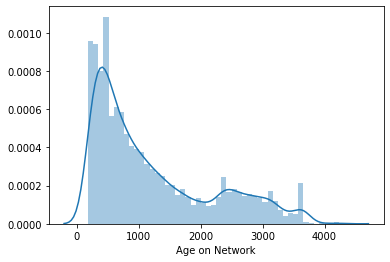

In [38]:
# Lets Check distribution plot and box plot for Age on network - number of days the customer is using the operator T network
sns.distplot(telecom_hv.aon)
plt.xlabel("Age on Network")
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There are more high value customers when the Age of the customer on network is less. 
 - With increasing Age the number of high value customers seems to be decreasing with a slight increase after 2000 days.
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
  - The possible reason could be that the provider has been providing more number of benifits during early stage to attract more customers.
  - There might be change in policies that apply with every passing year/month making things difficult for customers.
 </font>

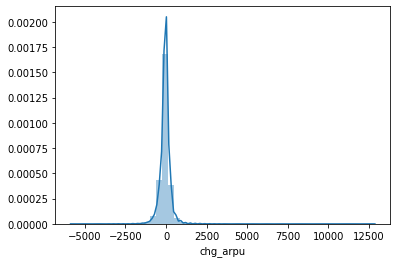

In [39]:
# Check distribution of arpu change
sns.distplot(telecom_hv.chg_arpu)   

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There are plenty of customers who generate same amount of revnue.
 - There are a few customers who generate less amount of revenue than previous months and few who generate more revenue
 - This seems to be a Normal distribution with mean at Zero
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The people generating more revenue might be the people who are impressed with the services.
 - While the Ones that have generated low income revenue might very well be people who found the services not upto the mark and might most likely Churn.
</font>

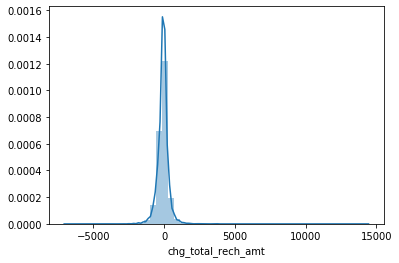

In [40]:
# Check distribution for chg_total_rech_amt
sns.distplot(telecom_hv['chg_total_rech_amt'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There are plenty of customers who recharge same amount.
 - There are a few customers who recharge less amount than previous months and few who recharge more amount
 - This seems to be a Normal distribution with mean at Zero
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The people recharging more amount might be the people who are impressed with the services.
 - While the Ones that have rechatging low amount might very well be people who found the services not upto the mark and might most likely Churn.
 - There is also a possibility that some new offer has been introduced specific to certain customers which might be wavering their revenue.
 - It also seems that there is a very high correlation between Change in average revenue generated and change in total recharge amount
</font>

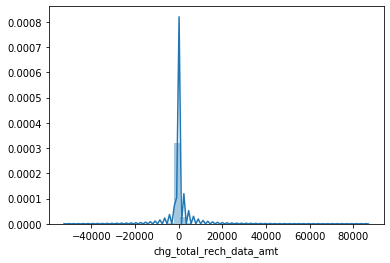

In [41]:
# Check distribution for chg_total_rech_data_amt
sns.distplot(telecom_hv['chg_total_rech_data_amt'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There are plenty of customers who recharge same amount.
 - Only a very minor percentage of people recharge more or less than previous months
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - I think most of the customers are satisfied with theInternet services provided 
 - There might also be a possibility that most of them are not using data services provided
</font>

<font color="#7F5A58" face='Comic Sans MS'> Let us see effect of revenue on Churn and how few other features are related</font>

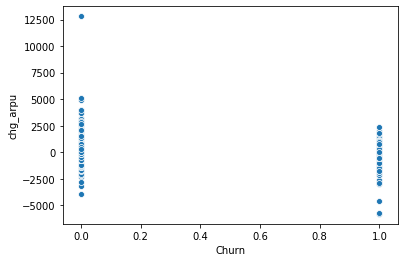

In [42]:
# Churn vs Avg. Revenue generated
sns.scatterplot(telecom_hv['Churn'],telecom_hv['chg_arpu'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The people who generate less revenue as compared to previous months have more chance of churning. But there are a few people who churn even after generating higher revenue than before.
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - As per our previous analysis, People generating less revenue are being Churned more. 
 - It should also be noticed that there are quite number of people who are not churning whcih might be that they have not generated more revenue than month before due to various personal reasons of the customer. 
</font>

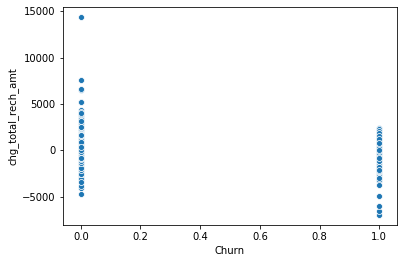

In [43]:
# Churn vs chg_total_rech 
sns.scatterplot(telecom_hv['Churn'],telecom_hv['chg_total_rech_amt'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The people who recharged more as compared to previous recharges chance of churning. 
</font>
 
<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - As per our previous analysis, People recharge amount is lesser than beforee are being Churned more. 
 - It should also be noticed that there are quite number of people who are churning even when they generated more revenue so this seem to have no effect on the Churn.
 - we see a single high value in chg_total_rech_amount. This is completely acceptable but might effect when we do Logistic regression for creating a model to understand the characterstics. We will be removing that row when such a situation arises.
</font>

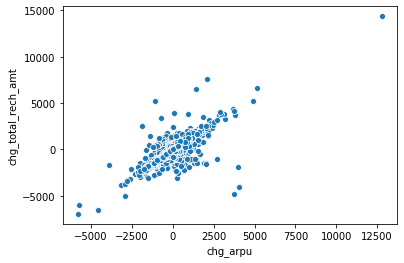

In [44]:
# chg_arpu vs chg_total_rech 
sns.scatterplot(telecom_hv['chg_arpu'],telecom_hv['chg_total_rech_amt'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - There seems to be a linear relationship between the two attributes.
 - Having said that it is very clear that as total recharge amount increases the revenue generated also increases.

<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - We can clearly see that there is certain level of linear relationship but not completely linear, we assume that might because of different plans generating different levels of revenue.
 - the linear relationship we find is because any organizations main goal is to maintain profits and they try to maintain that to max extent possible. 
 - And also customers might have been using same rechange amount multiple time generating similar revenue which makes the relationship linear
 - Also the revenue might be dependent on data charges as well so there might not have been a purely linear graph

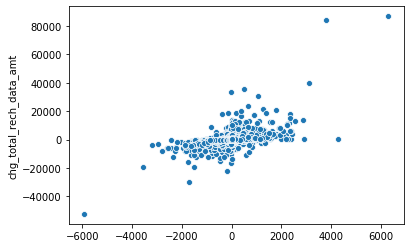

In [45]:
# chg_arpu_2g and 3g vs chg_total_rech _data
sns.scatterplot(telecom_hv['chg_arpu_2g']+telecom_hv['chg_arpu_3g'],telecom_hv['chg_total_rech_data_amt'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - We can't say there is a clear relationship in revenue generated.
 - Also most of the points are between [-2000,2000] change in revenue

<font color='Green' face='Comic Sans MS'><b>Analysis:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - This might particulary be due to the reason that few people take advantage of plans and use the data to the maximum extent causing revenue loss and others might no be doing the same and very rarely use data services in such a case there will be profit for the company.

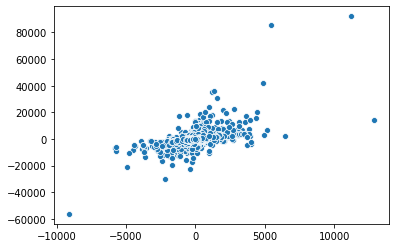

In [46]:
# Change in total revenue vs Change in total recharge
sns.scatterplot(telecom_hv['chg_arpu']+telecom_hv['chg_arpu_2g']+telecom_hv['chg_arpu_3g'],telecom_hv['chg_total_rech_amt']+telecom_hv['chg_total_rech_data_amt'])
plt.show()

<font color='Green' face='Comic Sans MS'><b>Observations:</b></font>
<font color='Blue' face='Comic Sans MS'>
 - The graph isn't following any particular trend and is very difficult to identify what sort of relationship they have

<b><font color='#7F5217' face='Comic Sans MS'>Now that we have done some analysis on variables we think might effect Churn. We will try to see how well these are related using heatmap</font></b>

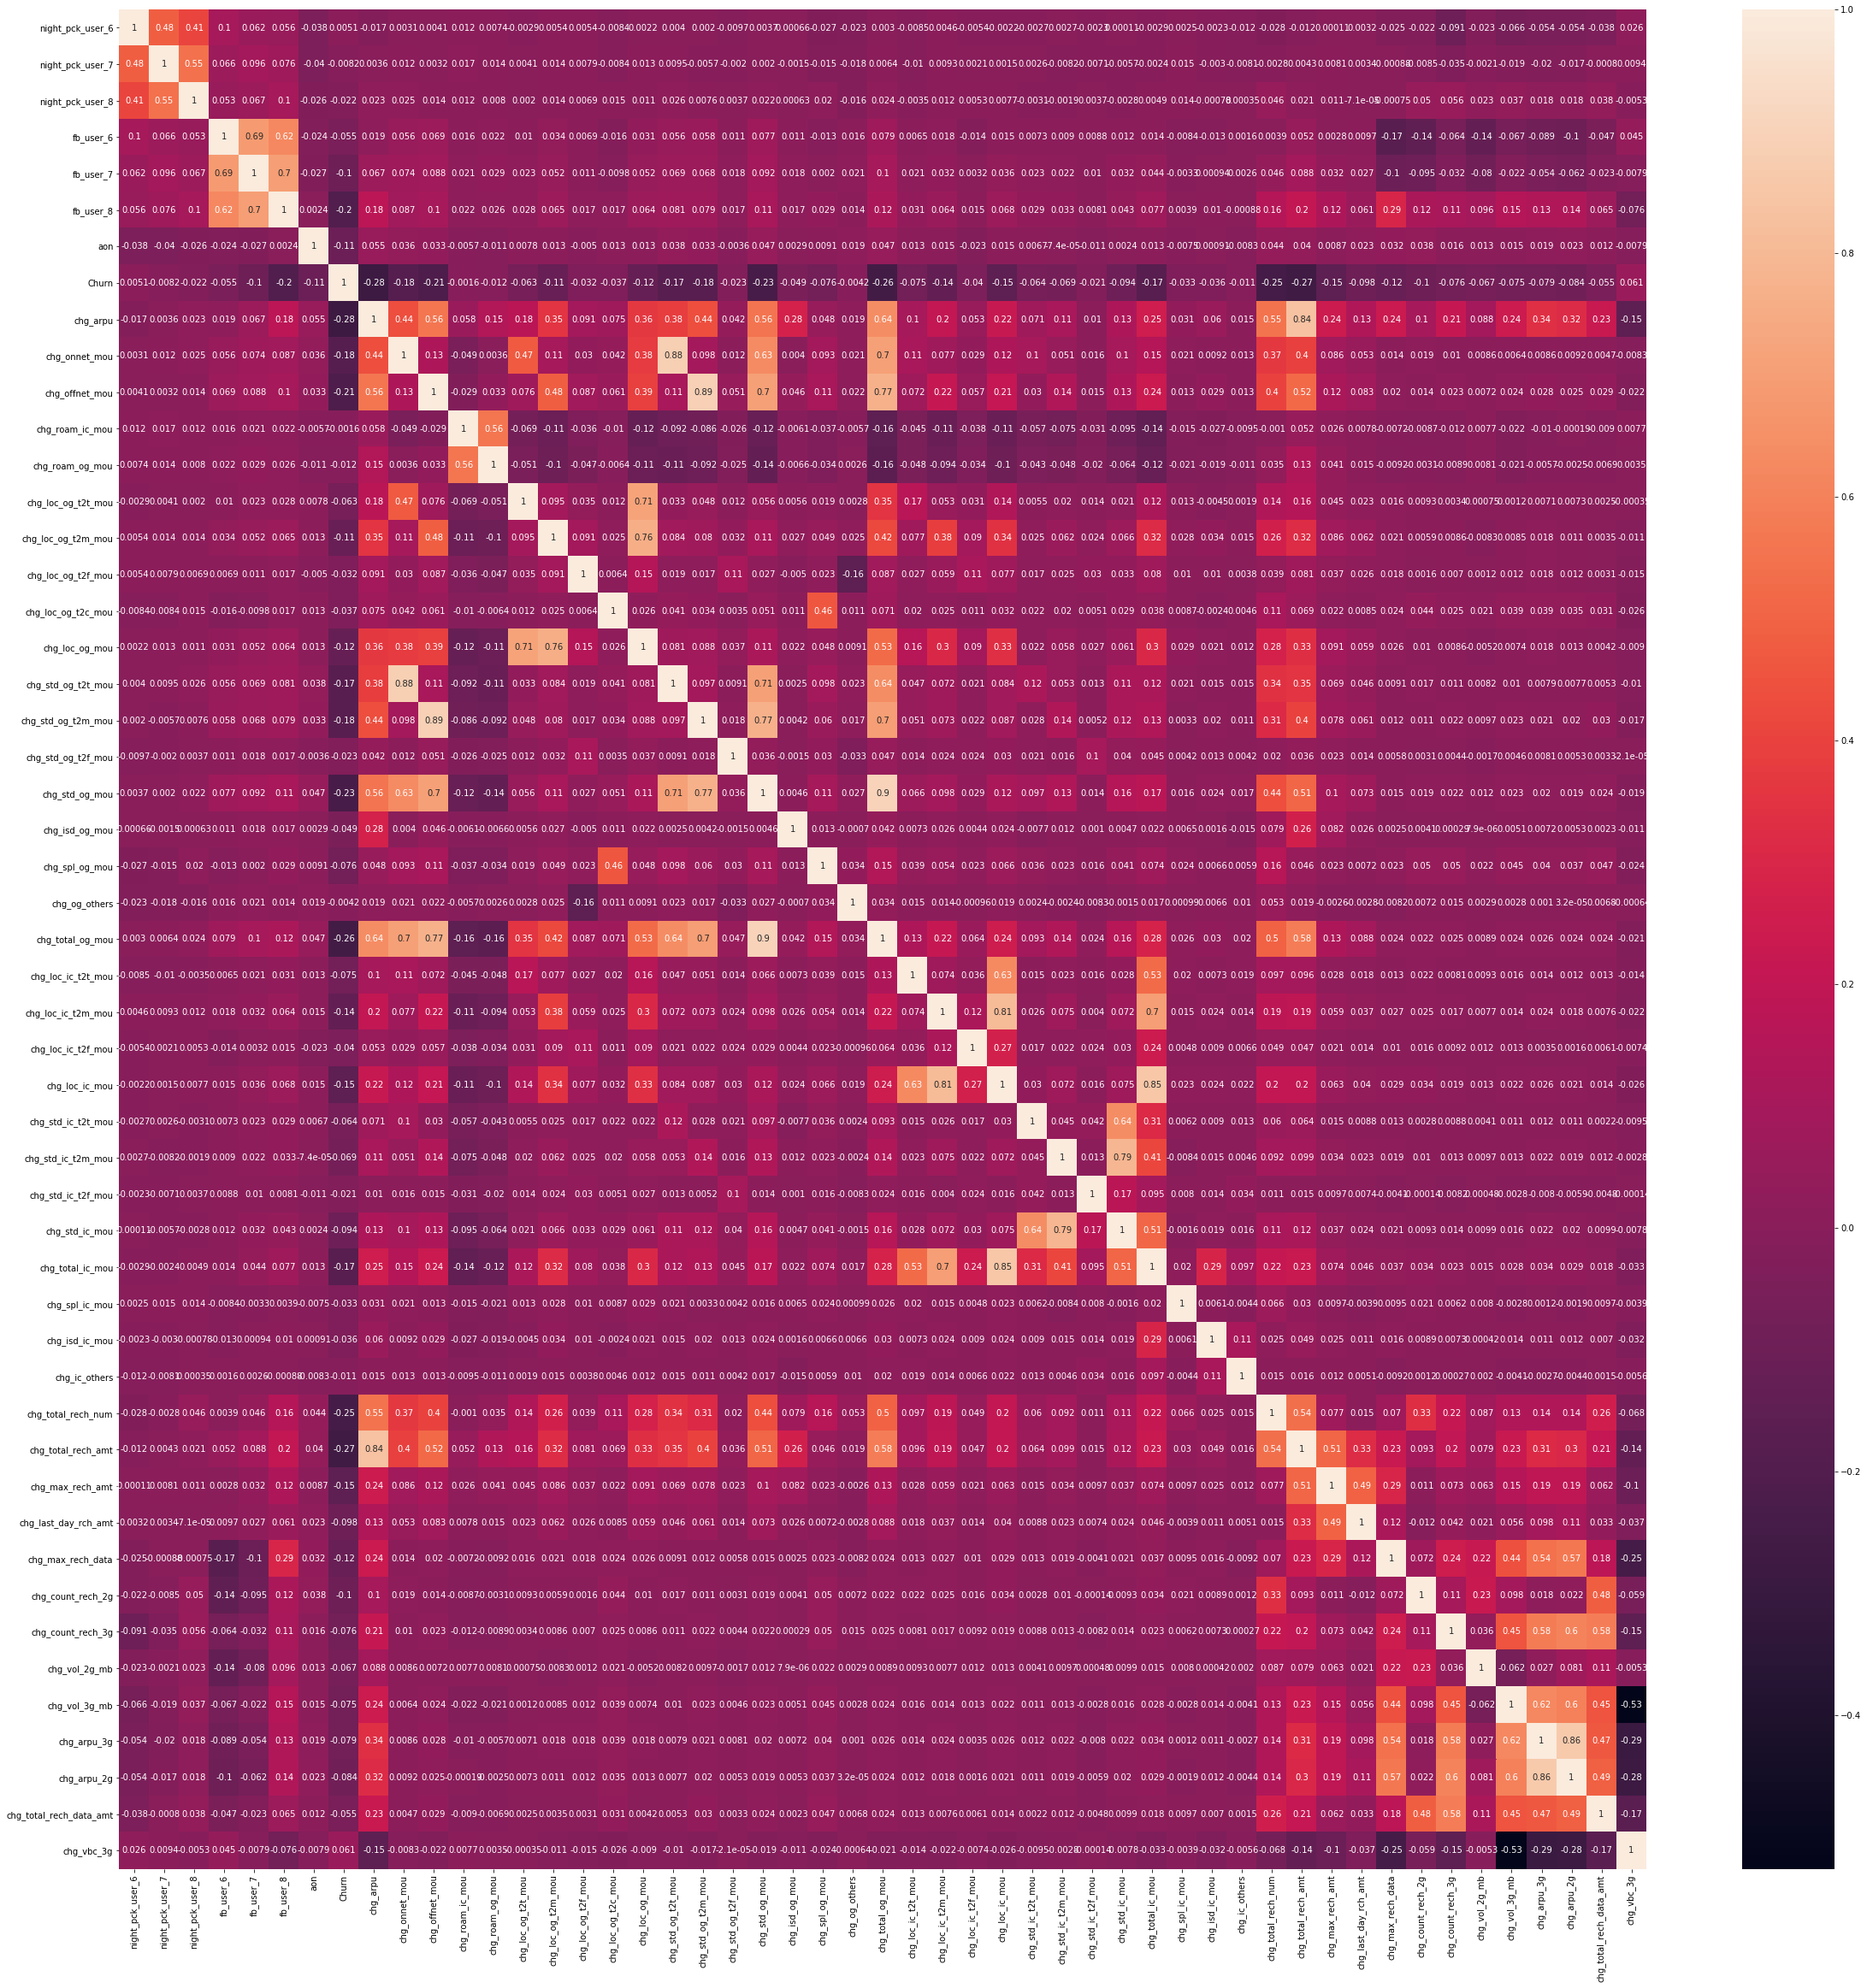

In [47]:
#Check correlations
plt.figure(figsize=(40,40))
sns.heatmap(telecom_hv.corr(),annot=True)
plt.show()

<font color='Red' face='Comic Sans MS'> Even though we cannot clearly see the values, It can be understood from color coding that there are quite a bit of values which are highly correlated.</font><br>

<font color='#2B65EC' face='Comic Sans MS'> We will not be doing any operations as of now for removing that as we would be using PCA for creating few models which would handle this multicollinearity </font>

In [48]:
# Churn %age
telecom_hv.Churn.value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

<font color='#357EC7' face='Comic Sans MS'> We have churn percentage of about 8% in high value customers, which we think is very less for analysis provided the rows are just 30000. So we have go for Imbalance Treatment</font>

<b><font color='#348781' face='Comic Sans MS'> SMOTE does oversampling of minority data and thus making data Balanced. However, when it comes to real time scenario, the data we get might still have only limited number of Churn cases. So we apply SMOTE only after train-test Split</font></b>

## <font color='59E817' face='Cursive'> Train Test Split</font>

<font color=' dark pink' face='Comic Sans MS'> Before we split the data lets identify the target variable and categorical variables that we might need to create dummies for</font>

In [49]:
# Check info
telecom_hv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   night_pck_user_6         30001 non-null  float64
 1   night_pck_user_7         30001 non-null  float64
 2   night_pck_user_8         30001 non-null  float64
 3   fb_user_6                30001 non-null  float64
 4   fb_user_7                30001 non-null  float64
 5   fb_user_8                30001 non-null  float64
 6   aon                      30001 non-null  int64  
 7   Churn                    30001 non-null  int64  
 8   chg_arpu                 30001 non-null  float64
 9   chg_onnet_mou            30001 non-null  float64
 10  chg_offnet_mou           30001 non-null  float64
 11  chg_roam_ic_mou          30001 non-null  float64
 12  chg_roam_og_mou          30001 non-null  float64
 13  chg_loc_og_t2t_mou       30001 non-null  float64
 14  chg_loc_og_t2m_mou    

<b><font color='#FF8040' face='Comic Sans MS'> Target Variable is : Churn </font><br></b>
<font color='#F75D59' face='Comic Sans MS'> Categorical variables are : 
 1. night_pck_user_6         
 2. night_pck_user_7         
 3. night_pck_user_8         
 4. fb_user_6               
 5. fb_user_7               
 6. fb_user_8  </font>
 
<font color='#C24641' face='Comic Sans MS'> Lets Check what values they have and whther we need to create dummies for them </font>

In [50]:
for col in ['night_pck_user_6','fb_user_7','night_pck_user_7','fb_user_8','night_pck_user_8','fb_user_6']:
    print (telecom_hv[col].value_counts())

0.0    29594
1.0      407
Name: night_pck_user_6, dtype: int64
1.0    15722
0.0    14279
Name: fb_user_7, dtype: int64
0.0    29626
1.0      375
Name: night_pck_user_7, dtype: int64
0.0    15688
1.0    14313
Name: fb_user_8, dtype: int64
0.0    29660
1.0      341
Name: night_pck_user_8, dtype: int64
1.0    15525
0.0    14476
Name: fb_user_6, dtype: int64


<font color='#C24641' face='Comic Sans MS'> All the categorical variables have only two values 0 and 1 so we need not create any dummy variables. Now moving forward to splitting</font>

In [51]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

#Split train and test sets
telecom_hv_train, telecom_hv_test = train_test_split(telecom_hv, train_size = 0.7, stratify=telecom_hv['Churn'], random_state = 100)

In [52]:
# Check shapes of train and test sets
print(telecom_hv_train.shape)

print(telecom_hv_test.shape)

(21000, 51)
(9001, 51)


<font color='#B048B5' face='Comic Sans MS'> Now that we are done with train test split lets move to SMOTE for OverSampling of minority value in imbalanced datset</font>

## <font color='#7F525D' face='Cursive'>SMOTE (Synthetic Minority Oversampling Technique) </font>

<font color='Red' face='Comic Sans MS'>Before we proceed any further we better seperate our Independent and dependent Variables </font>

In [53]:
# Split train set
y_train = telecom_hv_train.pop('Churn')
X_train = telecom_hv_train

# Check shapes
print(y_train.shape)
print(X_train.shape)

(21000,)
(21000, 50)


In [54]:
# Split test set
y_test = telecom_hv_test.pop('Churn')
X_test = telecom_hv_test

# Check shapes
print(y_test.shape)
print(X_test.shape)

(9001,)
(9001, 50)


In [55]:
# Perform Over Sampling using SMOTE on train set
overSample = SMOTE(random_state=10)
X_train_res, y_train_res = overSample.fit_sample(X_train,y_train)

#Check shapes
print(X_train_res.shape)
print(y_train_res.shape)


(38582, 50)
(38582,)


<font color='Red' face='Comic Sans MS'>Now we clearly understand that the data has been oversampled. So now lets identify the Churn Percentage to be extra sure</font>

In [56]:
# Find Percentage of Churn And Non Churn
y_train_res.value_counts(normalize=True)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

<font color='Grey' face='Comic Sans MS'> Now that we have a balanced data set lets move forward with Model Building</fonr>

## <font color='#7D1B7E' face='Cursive'>Model Creation </font>
### <font color='#E45E9D' face='Cursive'>1. Logistic Regression </font>

### <font color='#E45E9D' face='Cursive'>2. Decision Trees</font>

<font color='Green' face='Comic Sans MS'> To implement Decision Tree there are several Steps we need to carry out few steps to get the best possible outcome. They are:</font>
<font color = 'Brown' face='Comic Sans MS'> 
 - SMOTE , To oversample the data for correct prediction
 - Decision Tree Creation
</font>
<font color='Green' face='Comic Sans MS'> We will be creating Pipeline for the same and using grid search to find best possible parameters</font>

In [57]:
# Create a pipeline to perform above mentioned steps
pipe = Pipeline([('smote',SMOTE(random_state=100)), ('dtree', DecisionTreeClassifier())], verbose = True)

<font color='Green' face='Comic Sans MS'> Now that we have created a pipeline for the steps mentioned we will have to chose the best params that would give us the best possible prediction</font>

<font color='Brown' face='Comic Sans MS'> The parameters to deccide in the pipeline above are:</font>
<font color='Blue' face='Comic Sans MS'>
 - smote : smote_ratio
 - dtree : max_depth, min_samples_leaf, min_samples_split, criterion


<font color='Green' face='Comic Sans MS'> Also since we don't want to missout on any single Churner we would be tagetting for maximum recall score </font>

In [58]:
# Create the parameter grid 
param_grid = {
    'smote__sampling_strategy' : np.linspace(0.01,1,10),
    'dtree__max_depth': range(5, 15, 5),
    'dtree__min_samples_leaf': range(20, 100, 20),
    'dtree__min_samples_split': range(20, 100, 20),
    'dtree__criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample

[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.1s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.0s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.9s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.1s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.1s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.2s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.0s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.0s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.1s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.0s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   1.2s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users


[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipe

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.6s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.2s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.3s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users


[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.5s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipe

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users


[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipe

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\91967\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 277, in fit
    Xt, yt, fit_params = self._fit(X, y, **fit_params)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    **fit_params_steps[name]
  File "C:\Users\91967\anaconda3\lib\site-packages\joblib\memory.py", line 355, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\91967\anaconda3\lib\site-packages\imblearn\pipeline.py", line 403, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **fit_params)
  File "C:\Users

[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.4s
[Pipeline] ............. (step 1 of 2) Processing smote, total=   0.1s
[Pipel

[Parallel(n_jobs=1)]: Done 3200 out of 3200 | elapsed: 35.1min finished


[Pipeline] ............. (step 2 of 2) Processing dtree, total=   0.9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=100)),
                                       ('dtree', DecisionTreeClassifier())],
                                verbose=True),
             param_grid={'dtree__criterion': ['entropy', 'gini'],
                         'dtree__max_depth': range(5, 15, 5),
                         'dtree__min_samples_leaf': range(20, 100, 20),
                         'dtree__min_samples_split': range(20, 100, 20),
                         'smote__sampling_strategy': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
             scoring='recall', verbose=1)

In [59]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtree__criterion,param_dtree__max_depth,param_dtree__min_samples_leaf,param_dtree__min_samples_split,param_smote__sampling_strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033459,0.003822,0.000000,0.000000e+00,entropy,5,20,20,0.01,"{'dtree__criterion': 'entropy', 'dtree__max_de...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,640
1,1.463663,0.092609,0.015931,3.578029e-03,entropy,5,20,20,0.12,"{'dtree__criterion': 'entropy', 'dtree__max_de...",0.536657,0.532164,0.467836,0.538012,0.564327,0.527799,0.032036,497
2,1.503354,0.090144,0.013007,2.722085e-03,entropy,5,20,20,0.23,"{'dtree__criterion': 'entropy', 'dtree__max_de...",0.507331,0.485380,0.540936,0.587719,0.578947,0.540063,0.039612,483
3,1.781474,0.130644,0.015009,1.287713e-03,entropy,5,20,20,0.34,"{'dtree__criterion': 'entropy', 'dtree__max_de...",0.542522,0.543860,0.488304,0.631579,0.631579,0.567569,0.055977,425
4,1.857370,0.032065,0.015128,1.465579e-03,entropy,5,20,20,0.45,"{'dtree__criterion': 'entropy', 'dtree__max_de...",0.548387,0.634503,0.570175,0.581871,0.687135,0.604414,0.050135,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.673809,0.020544,0.003979,6.314247e-04,gini,10,80,80,0.56,"{'dtree__criterion': 'gini', 'dtree__max_depth...",0.618768,0.654971,0.666667,0.663743,0.657895,0.652409,0.017321,252
636,0.723912,0.011453,0.003783,3.953316e-04,gini,10,80,80,0.67,"{'dtree__criterion': 'gini', 'dtree__max_depth...",0.653959,0.695906,0.684211,0.669591,0.719298,0.684593,0.022343,153
637,0.793887,0.015530,0.004189,3.992560e-04,gini,10,80,80,0.78,"{'dtree__criterion': 'gini', 'dtree__max_depth...",0.651026,0.695906,0.675439,0.701754,0.728070,0.690439,0.025894,135
638,0.838358,0.004650,0.003989,2.611745e-07,gini,10,80,80,0.89,"{'dtree__criterion': 'gini', 'dtree__max_depth...",0.692082,0.684211,0.672515,0.710526,0.704678,0.692802,0.013719,126


In [60]:
# printing the optimal Recall score and hyperparameters
print("best recall", grid_search.best_score_)
print(grid_search.best_estimator_)

best recall 0.7249867091972355
Pipeline(steps=[('smote', SMOTE(random_state=100, sampling_strategy=1.0)),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=80,
                                        min_samples_split=20))],
         verbose=True)


<b><font color='#E45E9D' face='Comic Sans MS'> We have identified best possible parameters for Decision tree. Let's now create model with best parameters and evaluate the metrics</font></b>

In [61]:
#SMOTE
X_train_res , y_train_res = SMOTE(random_state=100, sampling_strategy=0.99).fit_sample(X_train,y_train)
# model with optimal hyperparameters
telecom_tree =DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=80,
                                        min_samples_split=20)
telecom_tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=80,
                       min_samples_split=20)

In [62]:
# classification metrics for train set

y_pred_res = telecom_tree.predict(X_train_res)
print(classification_report(y_train_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     19291
           1       0.87      0.84      0.85     19098

    accuracy                           0.86     38389
   macro avg       0.86      0.86      0.86     38389
weighted avg       0.86      0.86      0.86     38389



In [63]:
# Predict Test accuracy and recall Score
y_pred_test = telecom_tree.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      8269
           1       0.32      0.68      0.44       732

    accuracy                           0.86      9001
   macro avg       0.65      0.78      0.68      9001
weighted avg       0.92      0.86      0.88      9001



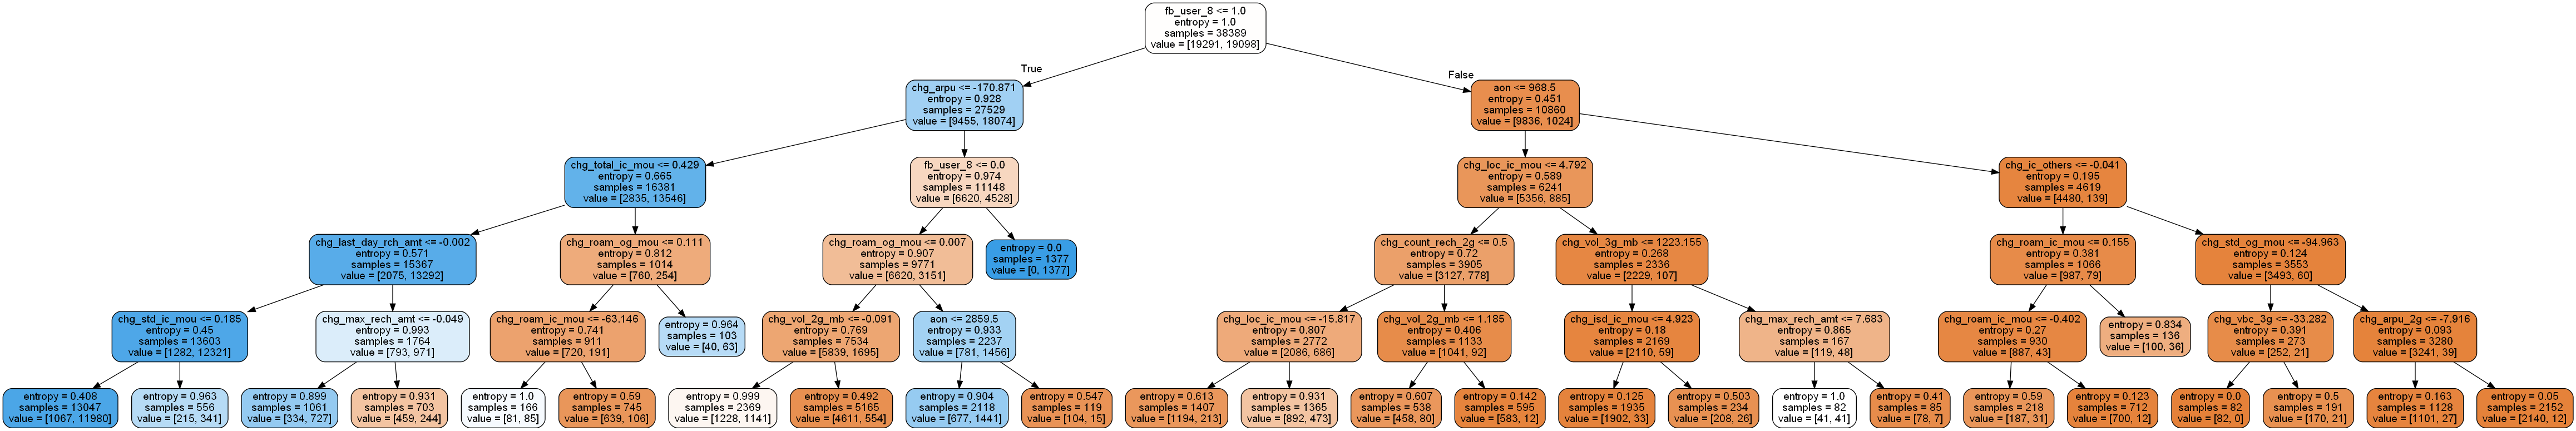

In [64]:
# Putting features
features = list(X_train.columns[0:])

# plotting the tree
dot_data = StringIO()  
export_graphviz(telecom_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<font color = 'Red' face='Comic Sans MS'> Although we have High Acuuracy precision is just 71% in train and 68% in test. Let's try to improve that using boosting. Also we would be able to find out important features using XGBOOST</font>

### <font color='Grey' face='Cursive'>XGBoost</font>

<font color='Brown' face='Comic Sans MS'> The important parameters we decide in XGBoost are:</font>
<font color='Blue' face='Comic Sans MS'>
 - subsample
 - learning_rate

<font color='Brown' face='Comic Sans MS'> We will try with diffrent combinations of above variables to find optimum values</font>

In [65]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.05,0.1,0.2], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)  

# fit the modelb
model_cv.fit(X_train_res, y_train_res)   

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  1.3min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [66]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.572876,0.870366,0.041888,0.001410,0.05,0.3,"{'learning_rate': 0.05, 'subsample': 0.3}",0.893811,0.955702,0.955545,0.935019,0.029139,9,0.964420,0.946199,0.947455,0.952691,0.008309
1,2.780232,0.019549,0.043550,0.000470,0.05,0.6,"{'learning_rate': 0.05, 'subsample': 0.6}",0.898052,0.959315,0.958687,0.938685,0.028733,8,0.972275,0.950754,0.951068,0.958032,0.010072
2,3.210414,0.078026,0.043550,0.000471,0.05,0.9,"{'learning_rate': 0.05, 'subsample': 0.9}",0.896481,0.962300,0.963713,0.940832,0.031366,7,0.974709,0.953739,0.954053,0.960834,0.009813
3,2.259623,0.089146,0.050864,0.004309,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.880773,0.975024,0.973296,0.943031,0.044029,6,0.982407,0.965049,0.963399,0.970285,0.008598
4,2.837744,0.014483,0.043883,0.000814,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.883129,0.979265,0.979422,0.947272,0.045356,4,0.987747,0.969526,0.971803,0.976359,0.008106
5,3.321455,0.154879,0.044880,0.002155,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.885014,0.980050,0.979422,0.948162,0.044653,2,0.988062,0.970311,0.972039,0.976804,0.007992
6,2.014945,0.023037,0.043883,0.000814,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.878731,0.986177,0.984449,0.949785,0.050248,1,0.995759,0.978637,0.978558,0.984318,0.008090
7,2.930496,0.139675,0.044548,0.001244,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.862080,0.989475,0.989632,0.947063,0.060092,5,0.997722,0.985077,0.987119,0.989973,0.005543
8,3.091900,0.037637,0.043550,0.000940,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.866007,0.989004,0.989004,0.948005,0.057981,3,0.997958,0.987198,0.986569,0.990575,0.005227


In [67]:
# printing the optimal Recall score and hyperparameters
print("best AUC", model_cv.best_score_)
print(model_cv.best_estimator_)

best AUC 0.9497853178343281
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)


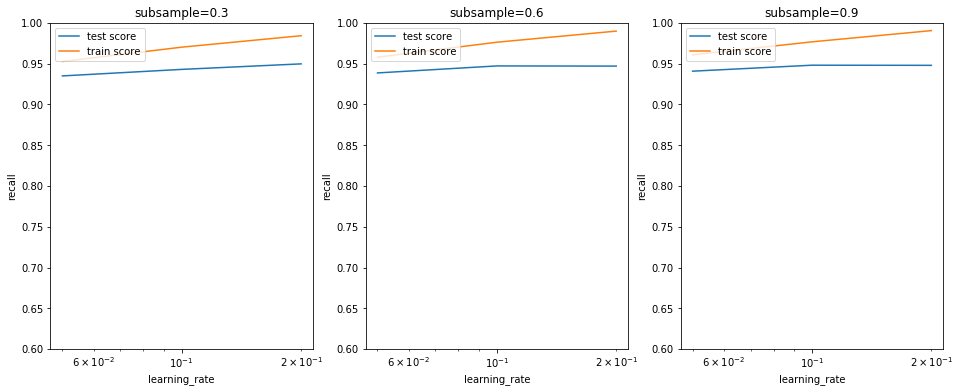

In [68]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.05,0.1, 0.2], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('recall')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

<font color='Green' face=''>The results show that a subsample size of 0.6 and learning_rate of about 0.4 seems optimal. Also, XGBoost has resulted in the highest recall (across various hyperparameters).</font>

In [69]:
params = {'learning_rate': 0.1,
          'subsample':0.6,
         }

# fit model on training data
telecom_xgb = XGBClassifier(params = params)
telecom_xgb.fit(X_train_res, y_train_res)

[20:57:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.1, 'subsample': 0.6}, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
# predict
y_pred_res = telecom_xgb.predict(X_train_res)
print(classification_report(y_train_res, y_pred_res))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19291
           1       0.99      0.99      0.99     19098

    accuracy                           0.99     38389
   macro avg       0.99      0.99      0.99     38389
weighted avg       0.99      0.99      0.99     38389



In [71]:
# Check for test data
y_pred_test = telecom_xgb.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8269
           1       0.53      0.56      0.54       732

    accuracy                           0.92      9001
   macro avg       0.74      0.76      0.75      9001
weighted avg       0.93      0.92      0.92      9001



In [72]:
# feature importance
importance = dict(zip(X_train_res.columns, telecom_xgb.feature_importances_))
weights = pd.Series(importance,
                 index=X_train_res.columns.values)
weights

night_pck_user_6           0.006841
night_pck_user_7           0.004243
night_pck_user_8           0.004946
fb_user_6                  0.039432
fb_user_7                  0.053728
fb_user_8                  0.288960
aon                        0.008470
chg_arpu                   0.063013
chg_onnet_mou              0.004377
chg_offnet_mou             0.008030
chg_roam_ic_mou            0.020327
chg_roam_og_mou            0.037531
chg_loc_og_t2t_mou         0.010419
chg_loc_og_t2m_mou         0.009203
chg_loc_og_t2f_mou         0.006870
chg_loc_og_t2c_mou         0.006876
chg_loc_og_mou             0.007483
chg_std_og_t2t_mou         0.007211
chg_std_og_t2m_mou         0.006225
chg_std_og_t2f_mou         0.004782
chg_std_og_mou             0.005612
chg_isd_og_mou             0.010587
chg_spl_og_mou             0.004755
chg_og_others              0.008476
chg_total_og_mou           0.008005
chg_loc_ic_t2t_mou         0.012332
chg_loc_ic_t2m_mou         0.022761
chg_loc_ic_t2f_mou         0

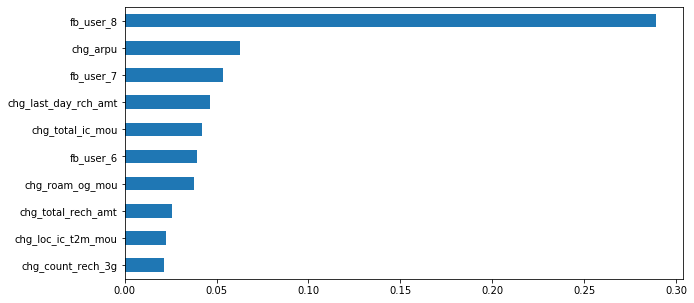

In [73]:
# plot
plt.figure(figsize=(10,5))
weights.sort_values()[-10:].plot(kind = 'barh')
plt.show()

### <font color='Magenta'> In quite contrast to what we expected, fb_user_8, chg_arpu , fb_user_7,  chg_last_day_rch_amt , chg_total_ic_mou are the top 5 predictors

In [74]:
telecom_hv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   night_pck_user_6         30001 non-null  float64
 1   night_pck_user_7         30001 non-null  float64
 2   night_pck_user_8         30001 non-null  float64
 3   fb_user_6                30001 non-null  float64
 4   fb_user_7                30001 non-null  float64
 5   fb_user_8                30001 non-null  float64
 6   aon                      30001 non-null  int64  
 7   Churn                    30001 non-null  int64  
 8   chg_arpu                 30001 non-null  float64
 9   chg_onnet_mou            30001 non-null  float64
 10  chg_offnet_mou           30001 non-null  float64
 11  chg_roam_ic_mou          30001 non-null  float64
 12  chg_roam_og_mou          30001 non-null  float64
 13  chg_loc_og_t2t_mou       30001 non-null  float64
 14  chg_loc_og_t2m_mou    

### <font color='#E45E9D' face='Cursive'>3. Random Forest</font>

<font color='Brown' face='Comic Sans MS'> Random Forest have few important parameters. They are:</font>
<font color='Blue' face='Comic Sans MS'>
 - max_depth
 - min_samples_leaf
 - min_samples_split
 - n_estimators
 - max_features

<font color='Brown' face='Comic Sans MS'> We will try with diffrent combinations of above variables to find optimum values. To try with different operations GridSearch is of Beat use.</font>

In [81]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
telecom_rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = telecom_rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 10.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [82]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8894998342558877 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [85]:
# Create a Random Forest Classifier
telecom_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)

# fit
telecom_rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [86]:
print(classification_report(y_test,telecom_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8269
           1       0.38      0.73      0.50       732

    accuracy                           0.88      9001
   macro avg       0.68      0.81      0.72      9001
weighted avg       0.93      0.88      0.90      9001

